# Exploratory Data Analysis of Star Dataset

This notebook performs exploratory data analysis (EDA) on a dataset containing information about stars. Through various visualizations such as histograms, scatter plots, and a correlation heatmap, we aim to uncover patterns, relationships, and distributions in the data. Non-numeric columns (like 'Color' and 'Spectral_Class') are excluded where appropriate.

## Loading the Dataset

We start by loading the dataset to examine its structure and the types of data available for analysis.

In [999]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Stars.csv')

data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## Statistical Depth

In [1001]:
descriptive_stats = data.select_dtypes(include=['float64', 'int64'])

In [1002]:
descriptive_stats.skew()

Temperature    1.321568
L              2.068069
R              1.946800
A_M           -0.121540
Type           0.000000
dtype: float64

In [1003]:
descriptive_stats.kurtosis()

Temperature    0.877352
L              4.465098
R              2.072935
A_M           -1.655888
Type          -1.269979
dtype: float64

In [1004]:
descriptive_stats.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Distribution of Temperature

The temperature distribution reveals how stars vary in surface temperature, an important factor that affects other attributes such as luminosity and color. Observing the temperature spread allows us to identify common ranges and outliers, which may correspond to different types of stars.

In [1007]:
# Set up the plotting style
plt.style.use('ggplot')

# Temperature distribution
def plot_stars_hist_Temp(data):
    plt.figure(figsize = (10, 6))
    sns.histplot(data['Temperature'], bins = 30)
    plt.title('Distribution of Temperature')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Frequency')
    plt.show()

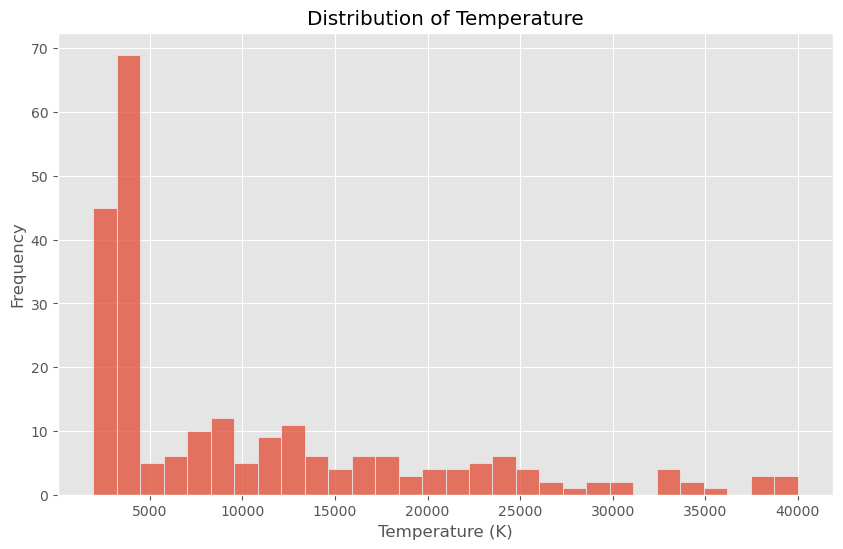

In [1008]:
plot_stars_hist_Temp(data)

The temperature distribution is right-skewed, with the majority of stars at lower temperatures. This suggests that cooler stars are more common in the dataset, while very hot stars are relatively rare.

## Distribution of Luminosity (L)

The luminosity distribution provides insight into the brightness range across the stars in the dataset. Stars with higher luminosity are often hotter and larger, so this visualization helps in categorizing stars by brightness levels.

In [1012]:
# Luminosity (L) distribution
def plot_stars_hist_L(data):
    plt.figure(figsize = (10, 6))
    sns.histplot(data['L'], bins = 30)
    plt.title('Distribution of Luminosity (L)')
    plt.xlabel('Luminosity')
    plt.ylabel('Frequency')
    plt.savefig("histL", dpi = 400)
    plt.show()

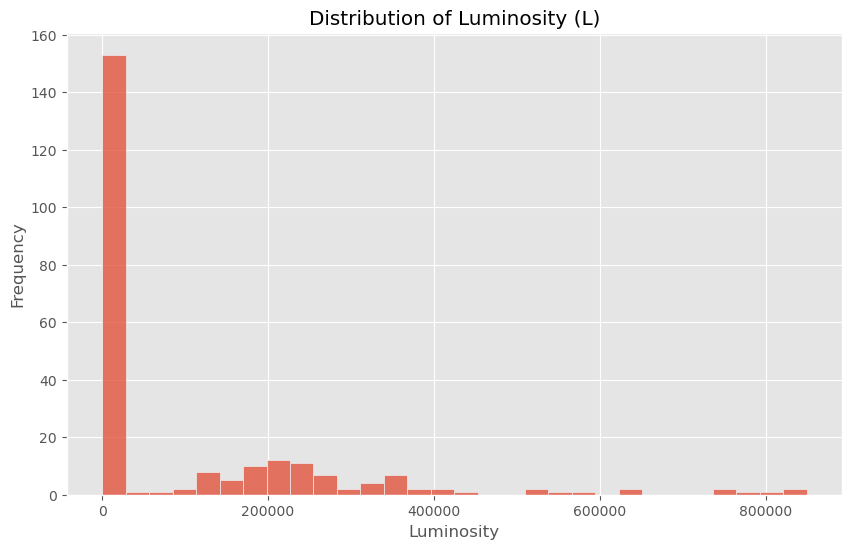

In [1013]:
plot_stars_hist_L(data)

The luminosity distribution is highly skewed, indicating a small number of stars with extremely high luminosity. Most stars have low luminosity, suggesting that dimmer stars are more prevalent.

## Distribution of Radius (R)

The radius distribution shows the size range of stars relative to the Sun's radius. Observing radius variations aids in understanding how size relates to other features, such as temperature and luminosity, as larger stars generally tend to be more luminous.

In [1017]:
# Radius (R) distribution
def plot_stars_hist_R(data):
    plt.figure(figsize = (10, 6))
    sns.histplot(data['R'], bins=30)
    plt.title('Distribution of Radius (R)')
    plt.xlabel('Radius (Solar Radii)')
    plt.ylabel('Frequency')
    plt.show()

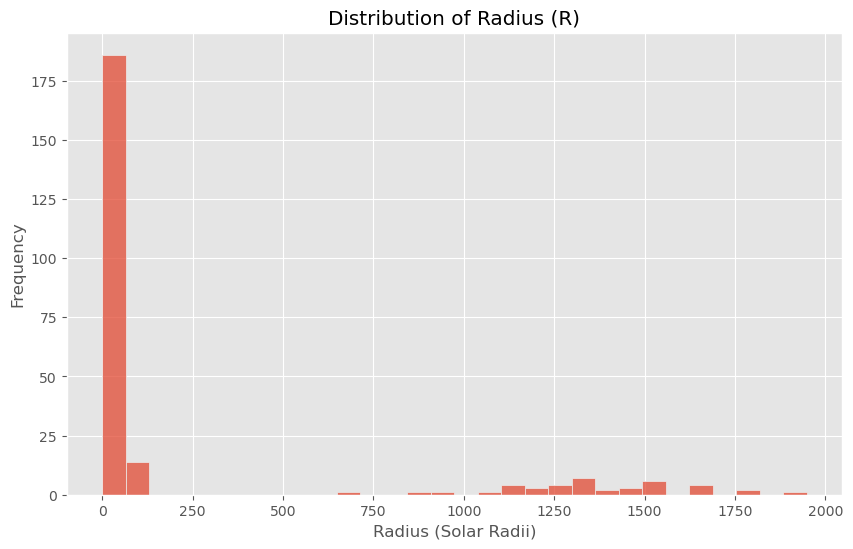

In [1018]:
plot_stars_hist_R(data)

Most stars in the dataset have small radii, with a few outliers having much larger sizes. This indicates that larger stars are less common in the sample.

## Distribution of Absolute Magnitude (A_M)

Absolute magnitude is a measure of intrinsic brightness. By examining its distribution, we can categorize stars based on their true luminosity, regardless of their distance from Earth. This metric helps distinguish between naturally dim and bright stars.

In [1022]:
# Absolute Magnitude (A_M) distribution
def plot_stars_hist_A_M(data):
    plt.figure(figsize = (10, 6))
    sns.histplot(data['A_M'], bins = 30)
    plt.title('Distribution of Absolute Magnitude (A_M)')
    plt.xlabel('Absolute Magnitude')
    plt.ylabel('Frequency')
    plt.savefig("histAM", dpi = 400)
    plt.show()

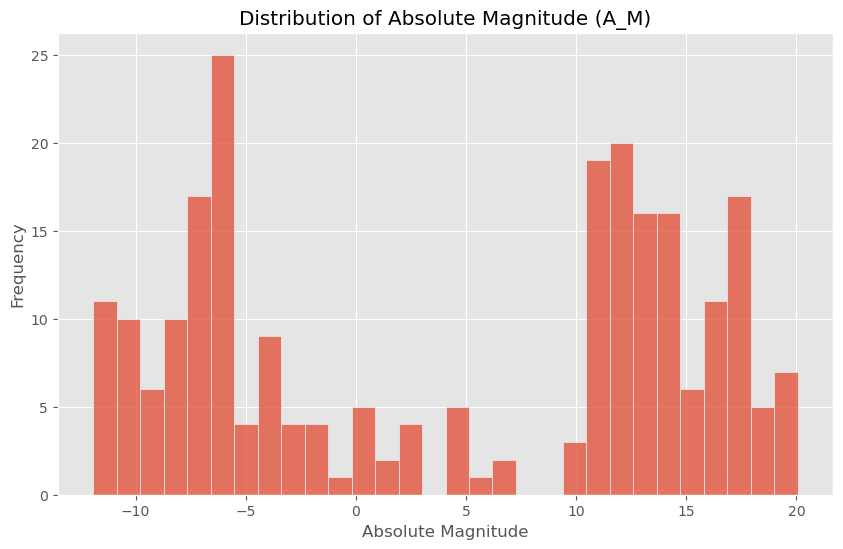

In [1023]:
plot_stars_hist_A_M(data)

The absolute magnitude distribution shows a range of brightness levels, with a concentration around specific values. Stars with low absolute magnitude are rare, suggesting that extremely bright stars are less frequent.

## Correlation Heatmap

The correlation heatmap reveals relationships between numerical features, helping us identify pairs of variables that change together. Strong correlations, such as between temperature and luminosity, might suggest that as one variable increases, the other tends to follow.

In [1027]:
# Correlation heatmap for numeric features
def plot_stars_scatter(data):
    plt.figure(figsize = (8, 6))
    sns.heatmap(data = data, annot = True, cmap = 'coolwarm', square = True)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.savefig("StarsCorrr.jpg", dpi = 400)
    plt.show()

In [1028]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

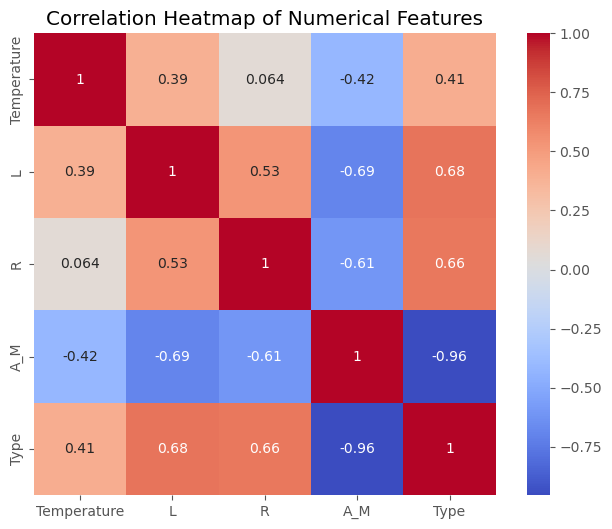

In [1029]:
plot_stars_scatter(numeric_data.corr())

The heatmap indicates a strong positive correlation between temperature and luminosity, as well as temperature and radius. This suggests that hotter stars are generally both larger and more luminous.

## Scatter Plot of Temperature vs Luminosity

This scatter plot shows the relationship between temperature and luminosity, with colors representing different star types. By examining this relationship, we can understand how star temperature influences brightness, a critical factor in stellar classification.

In [1033]:
# Scatter plot for Temperature vs Luminosity
def plot_stars_scatter(data):
    plt.figure(figsize = (10, 6))
    sns.scatterplot(data = data, x = 'Temperature', y = 'L', hue = 'Type', palette = 'Dark2', alpha = 0.7)
    plt.title('Scatter Plot of Temperature vs. Luminosity')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Luminosity')
    plt.legend(title = 'Star Type',  bbox_to_anchor = (0.89, 0.51))
    plt.savefig("scatterstars.png", dpi = 400)
    plt.show()

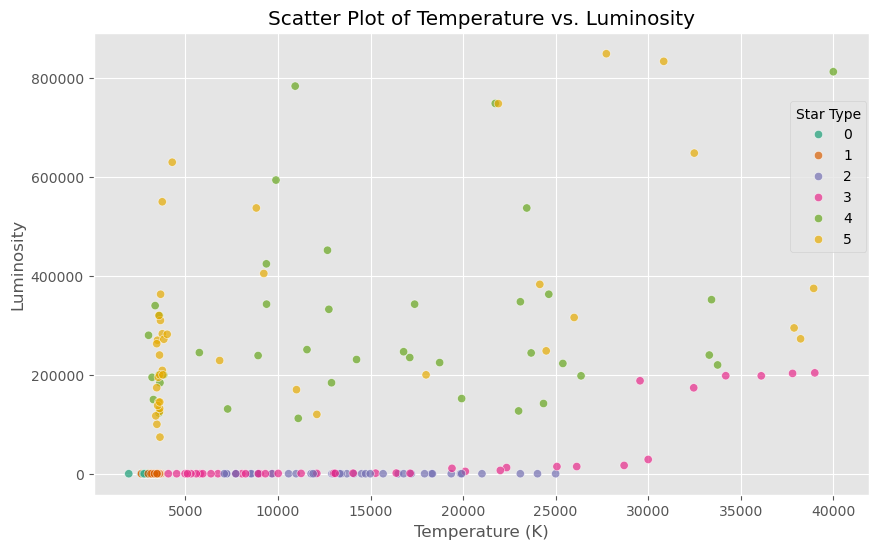

In [1034]:
plot_stars_scatter(data)